In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
# loan data
loan_data = "Task 3 and 4_Loan_Data.csv"
recovery_rate = 0.10

def load_data(path):
    return pd.read_csv(path)

def eda(data):
    
    # Summary Statistics
    print(data.describe())
    
    # Distribution of target variable (Default)
    sns.countplot(x='default', data=data)
    plt.title("Distribution of Default")
    plt.show()
    
    # Pairplot to visualize relationship and distribution of features
    sns.pairplot(data.drop('customer_id', axis=1), hue='default')
    plt.show()
    
    # Correlation heatmap
    correlation = data.drop('customer_id', axis=1).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


In [3]:
def preprocess_data(data):
    X = data.drop(['customer_id', 'default'], axis=1)
    y = data['default']
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def train_model(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    return clf


In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f"\nAUC Score: {auc_score:.2f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    avg_precision = average_precision_score(y_test, y_pred_prob)
    plt.plot(recall, precision, label=f'Avg Precision: {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


In [6]:
def feature_importance(model, features):
    
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [7]:
def expected_loss(loan_properties, model):
    if isinstance(loan_properties, pd.Series):
        loan_properties = loan_properties.to_frame().T
    
    pd_value = model.predict_proba(loan_properties)[:, 1]
    loss_value = loan_properties['loan_amt_outstanding'].values[0] * (1 - RECOVERY_RATE)
    return pd_value[0] * loss_value

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

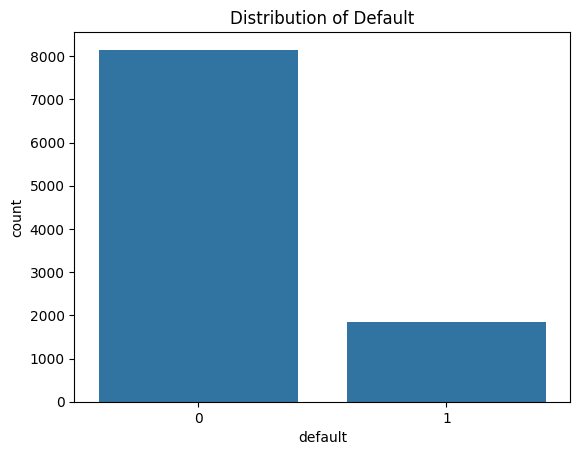

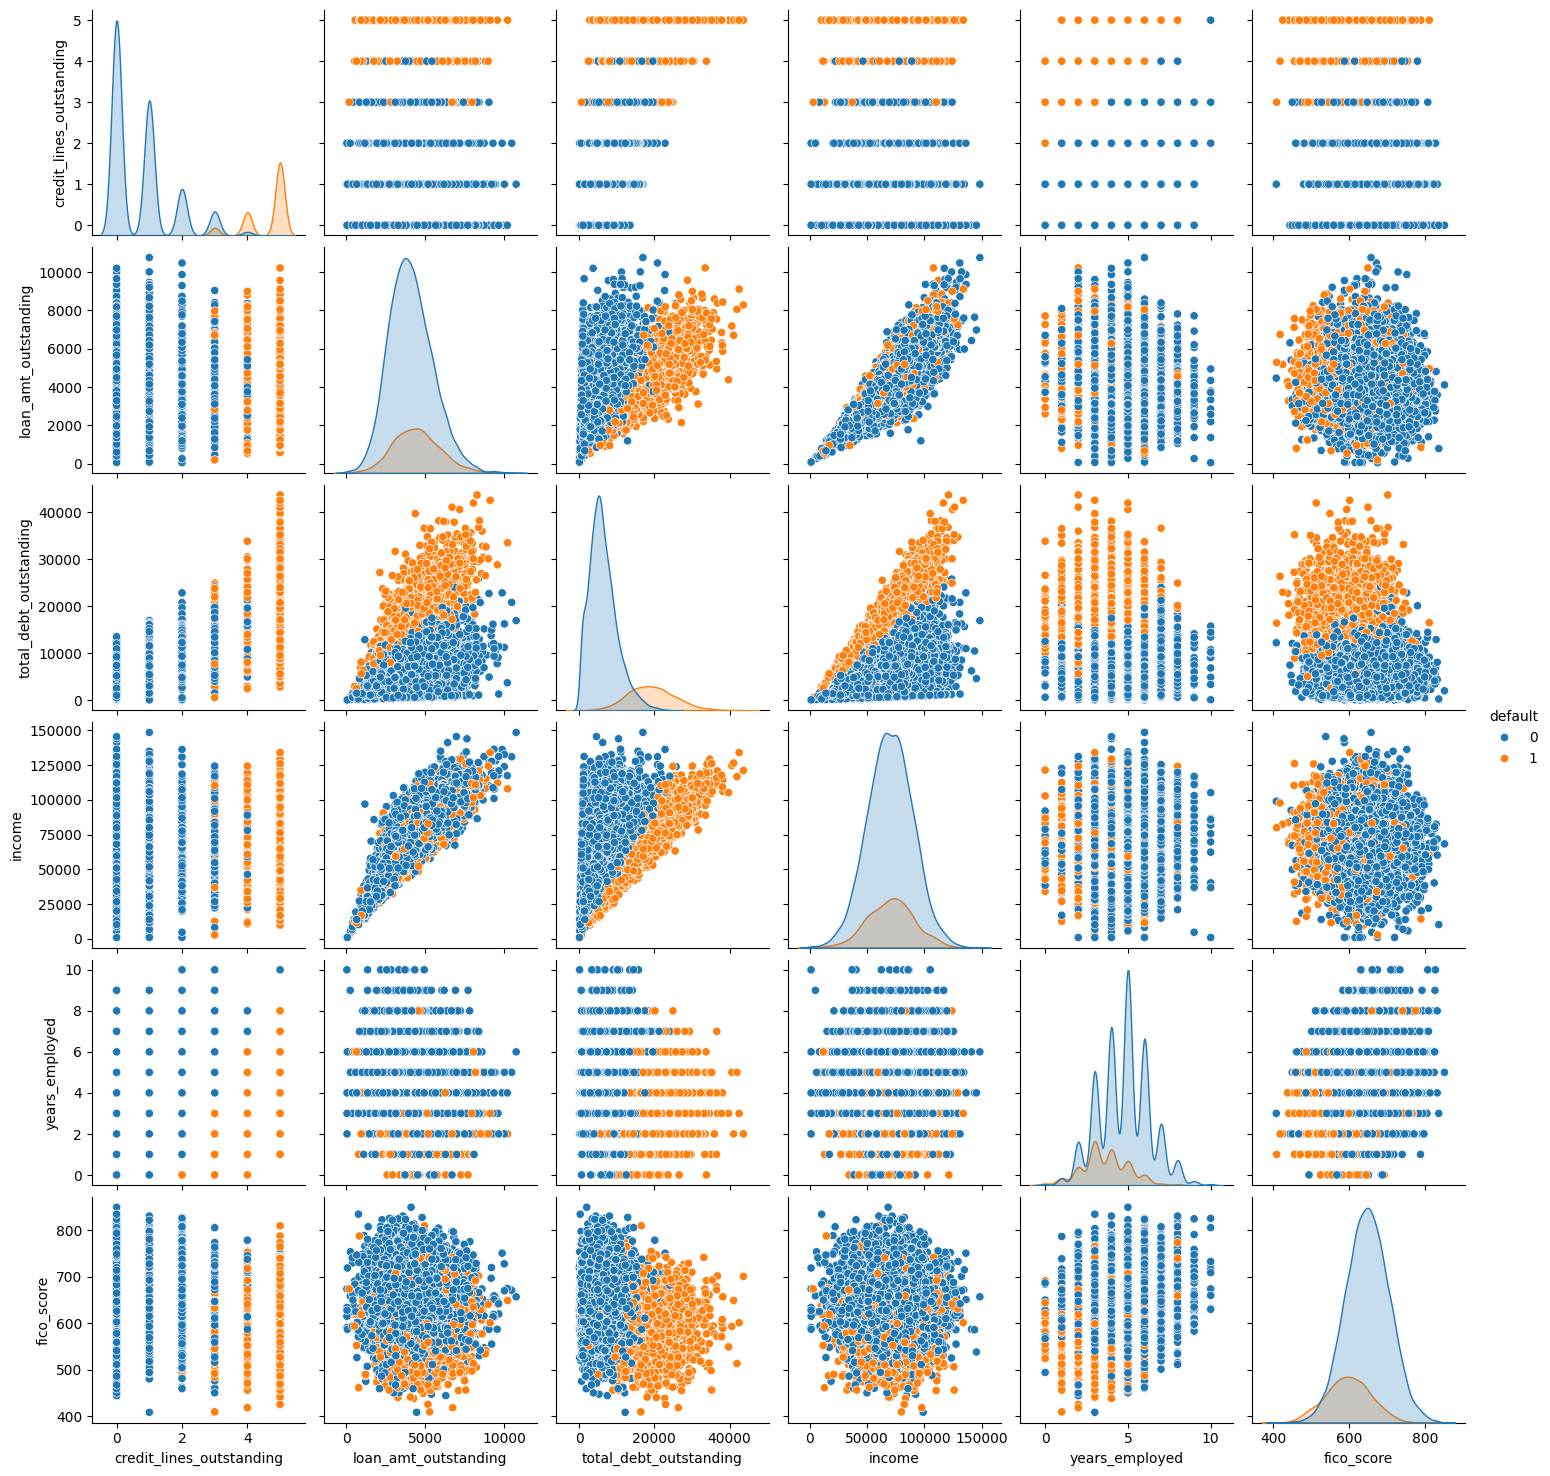

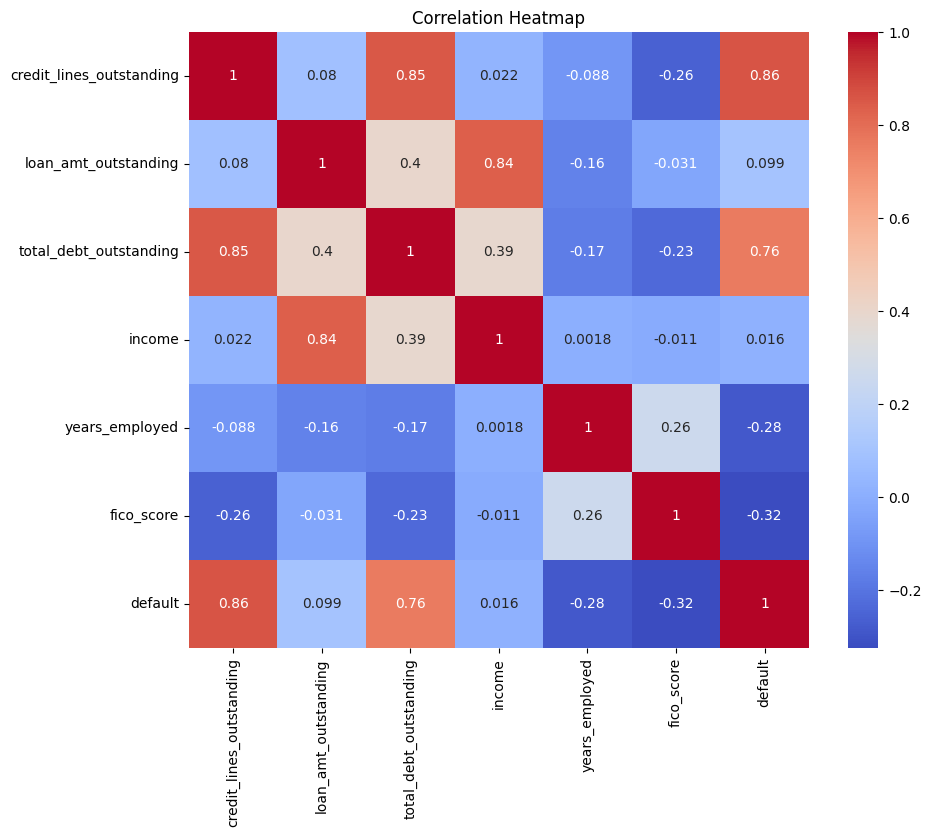

In [ ]:
if __name__ == "__main__":
    data = load_data(loan_data)
    
    # EDA
    eda(data)
    
    X_train, X_test, y_train, y_test = preprocess_data(data)
    clf = train_model(X_train, y_train)
    
    # Model Evaluation
    evaluate_model(clf, X_test, y_test)
    
    # Feature Importance
    feature_importance(clf, X_train.columns)
    
    # Test the expected_loss function
    sample_loan = X_test.iloc[0]
    loss = expected_loss(sample_loan, clf)
    print(f"\nExpected Loss for the sample loan: ${loss:.2f}")

    print("\nProcess completed successfully.")